 
![alt text](https://www.cdc.gov/injury/images/features/global-road-safety/LA_freeway_600x300.png "Accident Severity Prediction in USA")

<h3><center> <u> Accident Severity Prediction in USA </u> </center></h3>

<h2 style="text-align:right">Nandan Rajeev</h2>

## <u>Table of Contents</u>
* [Introduction](#introduction)
* [Data](#data)
* [Data Visualization](#data_vis)
* [Data Preparation](#data_prep)
* [Prediction Models](#pred)
* [Model Evaluation](#eval)
* [Accuracy Improvement](#improve)
* [Result](#result)

## <u> Introduction </u> <a name="introduction"></a>
With the continuously growing number of automobiles on the road, the road safety issues have been on the rise. Globally, approximately 1.35 million people die in road crashes each year and on average 3,700 people lose their lives every day on the roads. In the USA alone, more than 38,000 people die every year in crashes on roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. Road crashes are the leading cause of death in the U.S. for people aged 1-54.  

What can be done to reduce the risk of being in a road crash? Unfortunately, we can’t control the weather and get rid of poor driving conditions. Can we autonomously control all the cars on the road so that the driver mistakes can be minimized? Maybe in the future we can but right now, it’s not a feasible solution. Predicting accidents is difficult, but not impossible. Various factors come into play which can decide the severity of an accident. Such as car speed, weather, location of incident, road layout and so on. Can we make use of such features to predict the possibility of accidents and their severity? Yes!  By studying and analyzing previous recorded data of accidents, we can construct predictor models which can help us predict the severity of accidents which will enable us to take adequate measures in reducing the risk or severity of the accident.  
In this project, I will be using machine learning models to predict the severity of accidents by taking the various features as input which is the primary aim. We will also come across various additional insights into the data such as – Which state has the highest number of accidents? How severe are the accidents that occur?  

Such models can be utilized to predict accidents and their severity in real-time which can lead to a considerable decrease in the dangers of road accidents. 

This project has been completed for the attainment of the IBM Data Science Professional Certification. 



## <u>Data</u> <a name="data"></a>
The data used in this project is a dataset consisting of road traffic accidents that occurred in USA between February 2016 and June 2020, covering all the states. The dataset consists of around 3.5 million entries. This data has been collected by Lyft, for analyzing the delays caused by accidents.  
Our target variable here, will be the severity rating. Higher the severity of an accident, greater the traffic delay as the roads are often partially closed while the medical and road services are at work. By relating the traffic delay to the severity of the accident, the accidents are assigned a severity rating from 1 to 4 with 4 being the most severe.  
The independent variables which will be used as the features here consist of entries such as – Visibility, Presence of speed bumps, Presence of roundabouts, and so on. By using these as the features, the model will be trained and tested to predict the outcome. Different ML Algorithms will be applied and the best will be chosen based on their accuracies on an out-of-sample set.  
The dataset will be split into Training and Test sets for building and testing the models.  

The dataset attributes are shown below - 



|      #     |      Attribute               |      Description                                                                                                                                                                                                                           |      Nullable     |   |
|------------|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------|---|
|     1      |     ID                       |     This is a unique identifier of the accident record.                                                                                                                                                                                    |     No            |   |
|     2      |     Source                   |     Indicates source of the accident report (i.e. the API which reported   the accident.).                                                                                                                                                 |     No            |   |
|     3      |     TMC                      |     A traffic accident may have a Traffic Message Channel (TMC) code   which provides more detailed description of the event.                                                                                                              |     Yes           |   |
|     4      |     Severity                 |     Shows the severity of the accident, a number between 1 and 4, where 1   indicates the least impact on traffic (i.e., short delay as a result of the   accident) and 4 indicates a significant impact on traffic (i.e., long delay).    |     No            |   |
|     5      |     Start_Time               |     Shows start time of the accident in local time zone.                                                                                                                                                                                   |     No            |   |
|     6      |     End_Time                 |     Shows end time of the accident in local time zone. End time here   refers to when the impact of accident on traffic flow was dismissed.                                                                                                |     No            |   |
|     7      |     Start_Lat                |     Shows latitude in GPS coordinate of the start point.                                                                                                                                                                                   |     No            |   |
|     8      |     Start_Lng                |     Shows longitude in GPS coordinate of the start point.                                                                                                                                                                                  |     No            |   |
|     9      |     End_Lat                  |     Shows latitude in GPS coordinate of the end point.                                                                                                                                                                                     |     Yes           |   |
|     10     |     End_Lng                  |     Shows longitude in GPS coordinate of the end point.                                                                                                                                                                                    |     Yes           |   |
|     11     |     Distance(mi)             |     The length of the road extent affected by the accident.                                                                                                                                                                                |     No            |   |
|     12     |     Description              |     Shows natural language description of the accident.                                                                                                                                                                                    |     No            |   |
|     13     |     Number                   |     Shows the street number in address field.                                                                                                                                                                                              |     Yes           |   |
|     14     |     Street                   |     Shows the street name in address field.                                                                                                                                                                                                |     Yes           |   |
|     15     |     Side                     |     Shows the relative side of the street (Right/Left) in address field.                                                                                                                                                                   |     Yes           |   |
|     16     |     City                     |     Shows the city in address field.                                                                                                                                                                                                       |     Yes           |   |
|     17     |     County                   |     Shows the county in address field.                                                                                                                                                                                                     |     Yes           |   |
|     18     |     State                    |     Shows the state in address field.                                                                                                                                                                                                      |     Yes           |   |
|     19     |     Zipcode                  |     Shows the zipcode in address field.                                                                                                                                                                                                    |     Yes           |   |
|     20     |     Country                  |     Shows the country in address field.                                                                                                                                                                                                    |     Yes           |   |
|     21     |     Timezone                 |     Shows timezone based on the location of the accident (eastern,   central, etc.).                                                                                                                                                       |     Yes           |   |
|     22     |     Airport_Code             |     Denotes an airport-based weather station which is the closest one to   location of the accident.                                                                                                                                       |     Yes           |   |
|     23     |     Weather_Timestamp        |     Shows the time-stamp of weather observation record (in local time).                                                                                                                                                                    |     Yes           |   |
|     24     |     Temperature(F)           |     Shows the temperature (in Fahrenheit).                                                                                                                                                                                                 |     Yes           |   |
|     25     |     Wind_Chill(F)            |     Shows the wind chill (in Fahrenheit).                                                                                                                                                                                                  |     Yes           |   |
|     26     |     Humidity(%)              |     Shows the humidity (in percentage).                                                                                                                                                                                                    |     Yes           |   |
|     27     |     Pressure(in)             |     Shows the air pressure (in inches).                                                                                                                                                                                                    |     Yes           |   |
|     28     |     Visibility(mi)           |     Shows visibility (in miles).                                                                                                                                                                                                           |     Yes           |   |
|     29     |     Wind_Direction           |     Shows wind direction.                                                                                                                                                                                                                  |     Yes           |   |
|     30     |     Wind_Speed(mph)          |     Shows wind speed (in miles per hour).                                                                                                                                                                                                  |     Yes           |   |
|     31     |     Precipitation(in)        |     Shows precipitation amount in inches, if there is any.                                                                                                                                                                                 |     Yes           |   |
|     32     |     Weather_Condition        |     Shows the weather condition (rain, snow, thunderstorm, fog, etc.)                                                                                                                                                                      |     Yes           |   |
|     33     |     Amenity                  |     A POI annotation which indicates presence   of amenity in a nearby location.                                                                                                                                                           |     No            |   |
|     34     |     Bump                     |     A POI annotation which indicates presence of speed bump or hump in a   nearby location.                                                                                                                                                |     No            |   |
|     35     |     Crossing                 |     A POI annotation which indicates presence of crossing in a nearby location.                                                                                                                                                            |     No            |   |
|     36     |     Give_Way                 |     A POI annotation which indicates presence of give_way in a nearby location.                                                                                                                                                            |     No            |   |
|     37     |     Junction                 |     A POI annotation which indicates presence of junction in a nearby location.                                                                                                                                                            |     No            |   |
|     38     |     No_Exit                  |     A POI annotation which indicates presence of no_exit in a nearby location.                                                                                                                                                             |     No            |   |
|     39     |     Railway                  |     A POI annotation which indicates presence of railway in a nearby location.                                                                                                                                                             |     No            |   |
|     40     |     Roundabout               |     A POI annotation which indicates presence of roundabout in a nearby location.                                                                                                                                                          |     No            |   |
|     41     |     Station                  |     A POI annotation which indicates presence of station in a nearby location.                                                                                                                                                             |     No            |   |
|     42     |     Stop                     |     A POI annotation which indicates presence of stop in   a nearby location.                                                                                                                                                              |     No            |   |
|     43     |     Traffic_Calming          |     A POI annotation which indicates presence of traffic_calming in a nearby location.                                                                                                                                                     |     No            |   |
|     44     |     Traffic_Signal           |     A POI annotation which indicates presence of traffic_signal in a nearby location.                                                                                                                                                      |     No            |   |
|     45     |     Turning_Loop             |     A POI annotation which indicates presence of turning_loop in a nearby location.                                                                                                                                                        |     No            |   |
|     46     |     Sunrise_Sunset           |     Shows the period of day (i.e. day or night) based on sunrise/sunset.                                                                                                                                                                   |     Yes           |   |
|     47     |     Civil_Twilight           |     Shows the period of day (i.e. day or night) based on civil twilight.                                                                                                                                                                   |     Yes           |   |
|     48     |     Nautical_Twilight        |     Shows the period of day (i.e. day or night) based on nautical twilight.                                                                                                                                                                |     Yes           |   |
|     49     |     Astronomical_Twilight    |     Shows the period of day (i.e. day or night) based on astronomical twilight.                                                                                                                                                            |     Yes           |   |

#### Importing the dataset and important libraries

In [1]:
# The code was removed by Watson Studio for sharing.

## <u>Data Visualisation</u> <a name="data_vis"></a>
Let's understand the data better and get some valuable insights by plotting charts.

In [2]:
import matplotlib as mpl             
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Do the accidents occur more during the day or in the night?

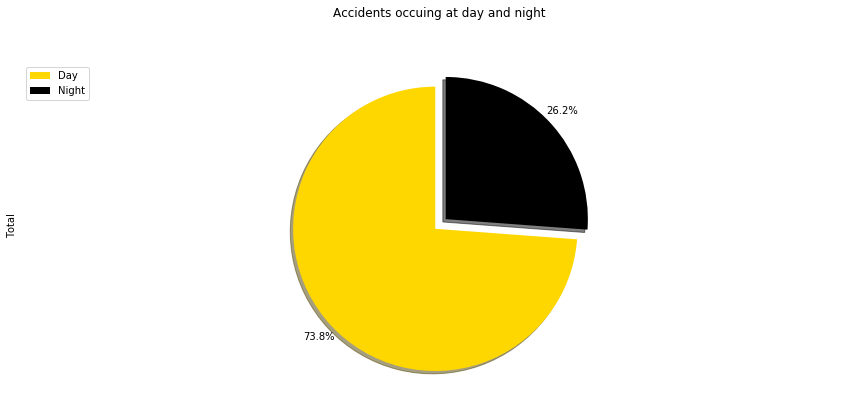

 We see that most of the accidents occur during the day.


In [3]:
df_daynight = df.groupby("Sunrise_Sunset").sum()
df_daynight["Total"] = [2593757, 919745]

# Plotting Pie Chart
colors_list = ['gold', 'black']
explode_list = [0.1, 0] 

df_daynight['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list 
                            )
plt.title('Accidents occuing at day and night', y=1.12) # scale the title up by 12% to match pctdistance

plt.axis('equal') 

plt.legend(labels=df_daynight.index, loc='upper left') # adding legend

plt.show()
print(" We see that most of the accidents occur during the day.")

#### Let's see the difference in occurances of the different severities

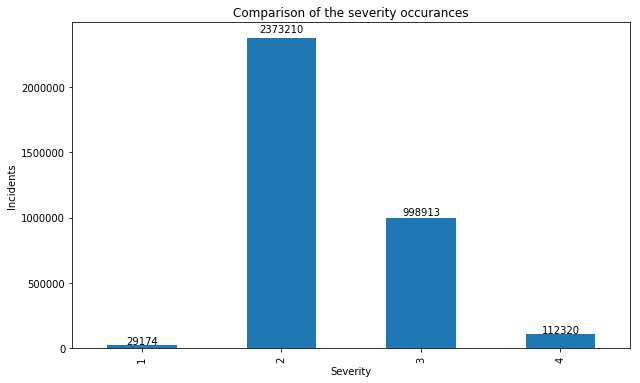

In [4]:
df_sev = df.groupby(["Severity"]).sum()
df_sev["Total"] = [29174,2373210,998913,112320]
ax = df_sev["Total"].plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Severity')
plt.ylabel('Incidents')
plt.title('Comparison of the severity occurances')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.show()

We can see that the accidents of severity rating 2 are most common.

#### Let's look at the statewise occurances of accidents. 

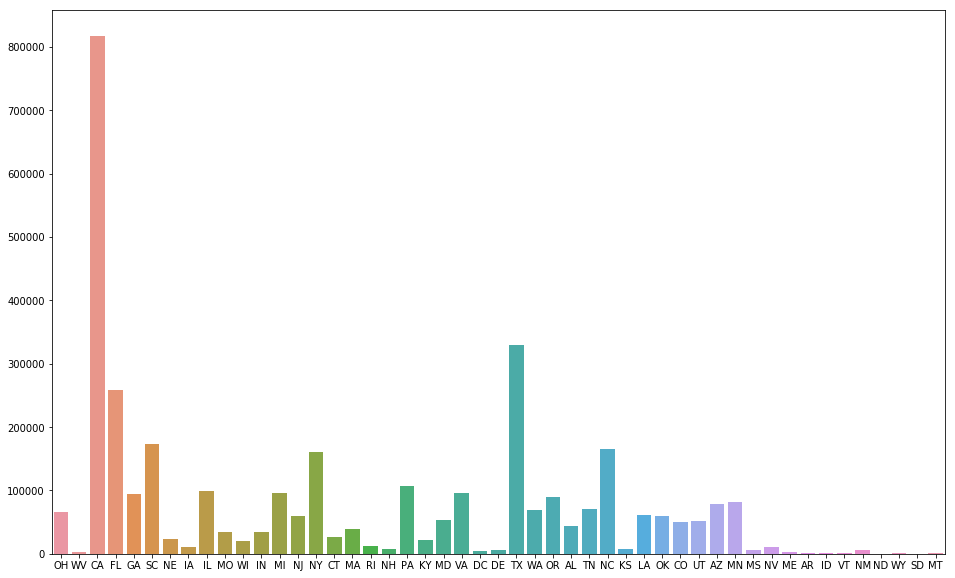

In [5]:
states = df.State.unique()
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])
plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

From the plot above, we can see that California has the most number of cases.
Let's now include severity ratings into the same chart.

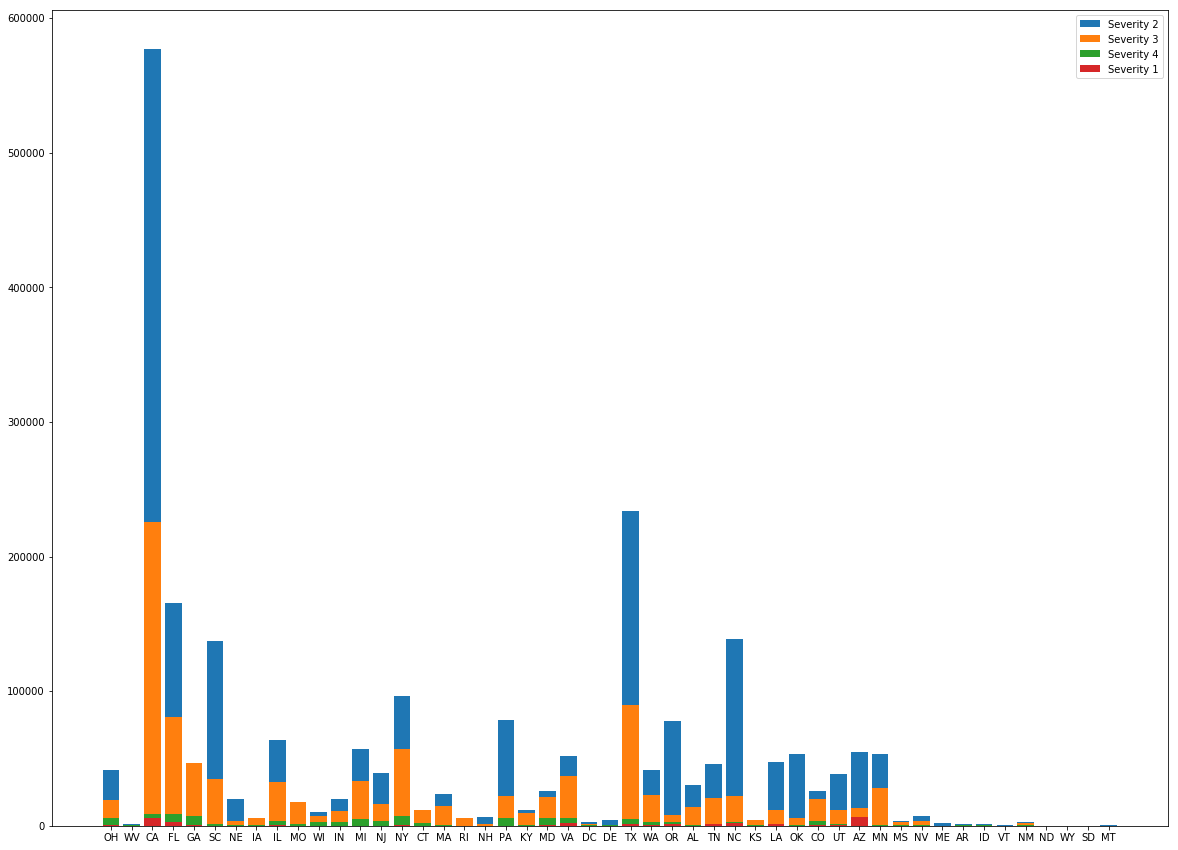

In [6]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df[(df['Severity']==1)&(df['State']==i)].count()['ID'])
    severity_2_by_state.append(df[(df['Severity']==2)&(df['State']==i)].count()['ID'])
    severity_3_by_state.append(df[(df['Severity']==3)&(df['State']==i)].count()['ID'])
    severity_4_by_state.append(df[(df['Severity']==4)&(df['State']==i)].count()['ID'])

plt.figure(figsize=(20,15))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')


plt.legend()

#### Let's see how visibility affects the occurence of accidents.
Before we do this, we need to address the missing values in this column.
Since replacing the missing values is not a good idea due when dealing with natural factors, we can drop the rows with missing visibility values (The number of entries with missing visibility values is low).

In [7]:
df_v = df.dropna(subset=["Visibility(mi)"], axis=0)
df_v.shape

(3437761, 49)

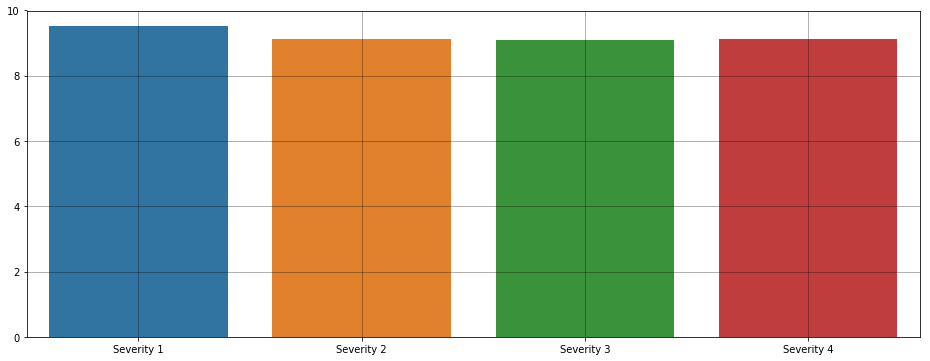

In [8]:
Visibility = df_v['Visibility(mi)']
Severity_1_data = df_v[df_v['Severity']==1]['Visibility(mi)'].mean()
Severity_2_data = df_v[df_v['Severity']==2]['Visibility(mi)'].mean()
Severity_3_data = df_v[df_v['Severity']==3]['Visibility(mi)'].mean()
Severity_4_data = df_v[df_v['Severity']==4]['Visibility(mi)'].mean()
Severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

Mean_visibility_by_severity = [Severity_1_data, Severity_2_data, Severity_3_data, Severity_4_data]

plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_visibility_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)

The visibility parameter doesn't seem to influence the severity cases significantly.  
Such charts can be plotted for any of the parameters in the dataset.

## <u>Data Preparation</u> <a name="data_prep"></a>

Let's load the data and check out it's various features. Here, we can drop unnecessary columns, change data types and modify entries to suit our analysis better.

In [9]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

Let's drop the parameters which are not required for the prediction models and store the modified data it in a different dataset for now.

In [10]:
df_N = df.drop(['Source','TMC','End_Lat','End_Lng','Number','Timezone', 'City','Airport_Code','Weather_Timestamp','Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight','Street','City','Side','County','Zipcode','Country','Description','Start_Time','End_Time','ID', 'Start_Lng','Start_Lat','State','Turning_Loop'], axis=1)
df_N.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

Since the data is very large and we will be taking a sample size for model building, we can consider only those entries which have all the required data. By dropping the rows with missing data, we have a smaller but more accurate dataset. 
If we were to consider the large dataset, we could interpolate the missing values by sorting it by geo-location and time to fix missing values. 

In [11]:
df_N.dropna(inplace = True) # Dropping rows with missing values
df_N.shape

(1280431, 24)

In [12]:
df_N.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
5,3,0.01,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,...,False,False,False,False,False,False,False,False,False,Day
9,3,0.01,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,...,False,False,False,False,False,False,False,False,False,Day
11,3,0.01,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,...,False,True,False,False,False,False,False,False,False,Day
14,2,0.01,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,...,False,False,False,False,False,False,False,False,True,Day
20,2,0.00,33.8,29.6,100.0,29.62,2.0,NNW,4.6,0.01,...,False,False,False,False,False,False,False,False,False,Day


#### Let's plot and study the difference in the severity distribution before and after dropping missing values.
This will help us decide if we can go ahead with this approach or not. If the distribution has varied vastly, or the frequecy gap between each has increased, we should not proceed with this approach.

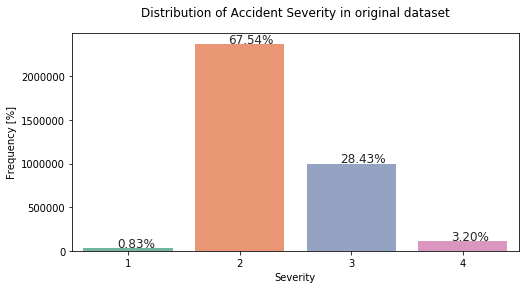

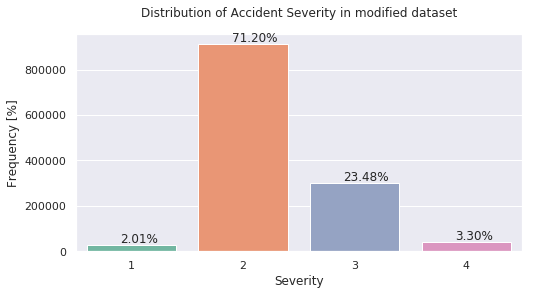

In [13]:
# Plotting Severity by percentage of original data 
import seaborn as sns
ax = sns.countplot(x = df.Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Accident Severity in original dataset',y=1.05)
plt.xlabel('Severity')
plt.ylabel('Frequency [%]')
plt.show()

# Plotting Severity by percentage of new data with dropped rows
import seaborn as sns
ax = sns.countplot(x = df_N.Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_N.Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Accident Severity in modified dataset',y=1.05)
plt.xlabel('Severity')
plt.ylabel('Frequency [%]')
plt.show()

We can see that the distribution hasn't changed massively or negatively. So, we can proceed to sample creation.

### Sample Creation
Even thought we have reduced the entries by more than half, the entries are still too vast due to my computation resource limitations. 
So, I will select a sample of the dataset to create the prediction models. After checking the best performing model on this sample, we can use that model on the full dataset.

#### We need to consider the weightage of the severities
So, from the severity occurence percentage values we plotted above, we will select our sample such that - 
* Severity 2 doesn't overpower the dataset 
* The lower occurring severities have an improved density in the dataset.

In [14]:
weights = np.where(df_N['Severity'] == 2, .3, .7) # Creating weights that are opposite of target
df = df_N.sample(frac=0.32, replace=True, weights=weights) # We will consider 32% of the dataframe as sample. We also assign the sample dataset to 'df'
print(df.shape)

(409738, 24)


#### Now plotting the severity distribution in the sample dataset.

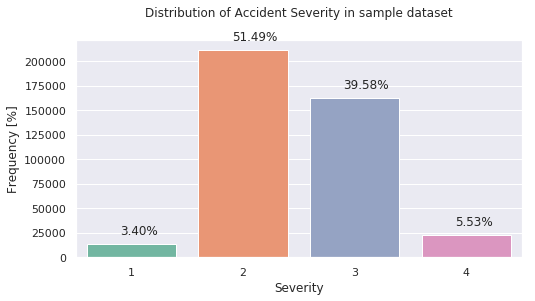

In [15]:
# Plotting Severity by percentage of sample
import seaborn as sns
ax = sns.countplot(x = df.Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Accident Severity in sample dataset',y=1.08)
plt.xlabel('Severity')
plt.ylabel('Frequency [%]')
plt.show()

By reducing the weightage of the highest severity, we can now use this sample to get a better model which isn't inclined to the dominant class.

### Data Transformation

Another crucial aspect of data preparation is data transformation. 
We need to convert the object type entries such as Day/Night, Wind Direction, etc into data types which the algorithm can understand. 
Let's create indicator variables using dummies method where each unique entry under one column, is given its own column and filled with 0's and 1's. The value will be 1 if the condition belongs to that entry and 0 if it isn't.

Let's go through all the object type entries in the sample dataset and create dummies for them.

#### Considering Day/Night - 

In [16]:
df["Sunrise_Sunset"].head()

731707     Night
685059     Night
1105869      Day
2893609      Day
2719189      Day
Name: Sunrise_Sunset, dtype: object

In [17]:
dummy_sun = pd.get_dummies(df["Sunrise_Sunset"]) # Creating the dummy values
dummy_sun.head()

,Day,Night
731707,0,1
685059,0,1
1105869,1,0
2893609,1,0
2719189,1,0


In [18]:
df = pd.concat([df, dummy_sun], axis=1) # Adding these columns to the dataframe and dropping the old column
df.drop(['Sunrise_Sunset'], axis=1 , inplace = True) # We need to drop the original column as we have added the dummy columns

#### Considering Wind Direction -

Let's check the different entries in the wind direction column

In [19]:
df["Wind_Direction"].value_counts()

CALM        61727
S           32554
W           28604
N           21927
WNW         21211
SSW         20947
NW          20435
SW          20103
SSE         20040
WSW         19547
VAR         19352
E           19131
NNW         18745
SE          16156
NNE         15069
NE          14692
ENE         14466
ESE         14375
North        3710
West         2573
East         2146
South        1545
Variable      683
Name: Wind_Direction, dtype: int64

In [20]:
dummy_wind = pd.get_dummies(df["Wind_Direction"])
dummy_wind.head()

,CALM,E,ENE,ESE,East,N,NE,NNE,NNW,NW,...,SSE,SSW,SW,South,VAR,Variable,W,WNW,WSW,West
731707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685059,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1105869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2893609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2719189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


As we can see,some of these columns can be combined into one.   
Eg - "West" is the same as "W"

In [21]:
dummy_wind["E"] = dummy_wind["E"] + dummy_wind["East"]
dummy_wind["N"] = dummy_wind["N"] + dummy_wind["North"]
dummy_wind["S"] = dummy_wind["S"] + dummy_wind["South"]
dummy_wind["W"] = dummy_wind["W"] + dummy_wind["West"]

dummy_wind.drop(["East","North","South","West"], axis = 1, inplace = True) # Dropping the duplicate entries

# Adding the dummy value columns to the dataframe and dropping the original column
df = pd.concat([df, dummy_wind], axis = 1)  
df.drop(["Wind_Direction"], axis = 1, inplace=True) 

#### Considering Weather Condition - 

In [22]:
df["Weather_Condition"].value_counts()

Fair                            159127
Cloudy                           64725
Mostly Cloudy                    56566
Partly Cloudy                    41648
Light Rain                       29224
Light Snow                       14470
Rain                              6881
Fog                               5566
Overcast                          5344
Haze                              3335
Heavy Rain                        2392
Fair / Windy                      2312
Light Drizzle                     2043
Snow                              1616
Mostly Cloudy / Windy             1493
Cloudy / Windy                    1441
T-Storm                           1288
Light Rain with Thunder           1061
Thunder in the Vicinity            964
Partly Cloudy / Windy              910
Thunder                            863
Heavy T-Storm                      757
Light Rain / Windy                 699
Light Freezing Rain                683
Wintry Mix                         520
Heavy Snow               

We can see that there are way too many different inputs where some are similar conditions but phrased differently.
Although this can help improve the model, the inputs in this dataframe for this column is inconsistent.   
Since there are too many unique entries, merging the similar conditions like we did for Wind Direction is not feasible.  
However, we have all individual weather parameters such as Temperature, Precicipitation, Visibility, etc. which will factor in the weather conditions. So, we can drop the Weather_Conditions column entirely.

In [23]:
df.drop(["Weather_Condition"], axis = 1, inplace = True) 

### Data Preparation for Modeling

Now, we shall define the features set ('X') which consists of the independent variables and the target set ('y') which has the dependent variable.

In [24]:
X = df.copy()
X.drop(["Severity"], axis = 1, inplace=True)
X.columns

Index(['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Day', 'Night', 'CALM', 'E', 'ENE',
       'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW',
       'VAR', 'Variable', 'W', 'WNW', 'WSW'],
      dtype='object')

In [25]:
X = X.values
y = df[["Severity"]].values

In [26]:
X[0:3]

array([[0.0, 65.0, 65.0, 90.0, 29.79, 8.0, 6.0, 0.01, False, False, True,
        False, False, False, True, False, False, False, False, True, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 51.0, 51.0, 71.0, 29.98, 10.0, 13.0, 0.0, False, False,
        False, False, False, False, False, False, False, False, False,
        True, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0.0, 84.0, 84.0, 63.0, 29.05, 10.0, 9.0, 0.0, False, False,
        False, False, False, False, False, False, False, False, False,
        True, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=object)

In [27]:
y[0:10]

array([[2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3]])

#### Data Standardizing 
This is done so that the ML models can understand the data better. This will prevent any individual parameters from influencing the outcome largely due to their larger values.

In [28]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Splitting into Train and Test Sets
We need to split the data into separate sets, one for training the models and one for carrying out tests on.
This is done so the out-of-sample accuracy will be depicted accurately.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Training Set:', X_train.shape,  y_train.shape)
print ('Test Set:', X_test.shape,  y_test.shape)

Training Set: (286816, 41) (286816, 1)
Test Set: (122922, 41) (122922, 1)


## <u>Prediction Models </u> <a name="pred"></a>

### Support Vector Machines

In [30]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7, max_iter = 1000) 
clf_svm.fit(X_train, y_train.ravel())


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=7, tol=0.0001,
     verbose=0)

The model above can be improved by increasing the max_iter parameter. However, this will require much higher computational power.

In [31]:
SVMPRED=clf_svm.predict(X_test)

In [32]:
SVMPRED[0:5]

array([2, 2, 3, 2, 3])

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear',multi_class = 'auto').fit(X_train,y_train.ravel())
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
LRPRED = LR.predict(X_test)

In [35]:
LRPRED[0:5]

array([2, 2, 3, 2, 3])

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
SevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [37]:
SevTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
TreePRED = SevTree.predict(X_test)

In [39]:
TreePRED[0:5]

array([2, 2, 2, 2, 2])

### K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
k = 534  # Considering the general thumb rule of assuming K as the squarroot of number of samples  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train.ravel())
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=534, p=2,
           weights='uniform')

In [41]:
KNNPRED = neigh.predict(X_test)

In [42]:
KNNPRED[0:5]

array([2, 2, 2, 2, 3])

## <u> Model Evaluation</u> <a name="eval"></a>

Let's compare the accuracies of these different models by finding their Jaccard indices

In [43]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of Support Vector Machine Model: ", jaccard_similarity_score(y_test, SVMPRED))
print("Accuracy of Logistic Regression Model: ", jaccard_similarity_score(y_test, LRPRED))
print("Accuracy of Decision Tree Model: ", jaccard_similarity_score(y_test, TreePRED))
print("Accuracy of K Nearest Neighbors Model: ", metrics.accuracy_score(y_test, KNNPRED))

Accuracy of Support Vector Machine Model:  0.5577032589772376
Accuracy of Logistic Regression Model:  0.556255186215649
Accuracy of Decision Tree Model:  0.5439953791835473
Accuracy of K Nearest Neighbors Model:  0.5614780104456485


| Algorithm          | Jaccard Index | 
|--------------------|---------|
| SVM                | 0.56       | 
|  Logistic Regression     |  0.56      | 
|  Decision Tree               | 0.55 |       
| KNN                 | 0.56       | 

### We see that the accuracies of the models are not very good. Let's investigate this deeper.
The severities of the accidents can often be misinterpreted due to minor differences in the conditions leading to it. We can take a look at how far off the severity predictions are in the cases of incorrect prediction.

In [45]:
data = {'Error': [],
        'Count': []
         
        }
dferror = pd.DataFrame (data, columns = ['Error','Count'])
Trial = LRPRED - y_test.T
trial = np.unique(Trial)
count = np.unique(Trial, return_counts = True)
count # Returns the prediction value differences and their frequency 

(array([-2, -1,  0,  1,  2]), array([ 3146, 34101, 68376, 16514,   785]))

In [47]:
dferror['Error'] = pd.Series(trial)
dferror['Count'] = [np.nan,np.nan,68376,50615,3931]
dferror.dropna(inplace=True)
dferror.set_index('Error', inplace = True)
dferror

,Count
Error,
0,68376.0
1,50615.0
2,3931.0


We can see that the vast majority of the incorrect predictions have mis-predicted the immediate neighboring severity level. So, the wrong predictions are often very close to the actual values. The accuracy would be nearly 97% if severities were clubbed.
This is a good sign as this means that the prediction model can be made to predict even more accurately. How can this be done? We will discuss this below.

## <u> Accuracy Improvement </u> <a name="improve"></a>

Now that we have examined the accuracies of all the models and found that the best algorithms to use are -
* Logistic Regression Model
* Support Vector Machine (With a higher number of iterations)  

We can now use this model to evaluate the dataset with greater accuracy. When I ran the more complex and larger dataset consisting of more dummy variables (3.5 million entries x 169 parameters)than those considered above through the machine learning models, the computation time was really long and the kernel often crashed. 
So firstly, it is important to have access to a supercomputer to be able to train models using the full dataset.

We can take the following measures for getting more accurate predictions -
* Consider the full dataset. We can fix a very large part of the missing data by interpolating the weather conditions. For this to be accurate, we need to sort the dataset by geo-location and time of occurrence. This will help create the weather parameters by considering the conditions of the areas in its vicinity at a time close to the incident. 
* Support Vector Machine - We can increase the maximum iterations to get a more improved solution. By default, we consider 1000 iterations. Increasing this will increase the computational time as well.
* K Nearest Neighbours Method - The optimal value of K has not been found here. To find the most suitable k value, we will need to run a FOR loop for a large range (like 10,400). This requires extremely high computational resources but will result with a better accuracy.
* Improving the data collection quality. There are many areas where the data recording process can be improved. If a more accurate and precise dataset was available (for eg- the numerous similar weather conditions which were phrased differently) the prediction capabilities will also be better.

## <u> Result </u> <a name="result"></a>

The dataset which has been cleaned, transformed and sampled has been put through the machine learning process and prediction models have been trained. From the accuracy comparison, we see that the Logistic Regression, SVM and KNN methods have the same accuracy. The Logistic Regression algorithm is the better choice of these as this model takes a significantly lesser time to train and predict. Now that we have chosen the best model for this project, this model can be trained on a more advanced computational environment using the complete dataset with interpolated missing values to get an even more accurate prediction model.